<a href="https://colab.research.google.com/github/krishkrishna03/MLP_FACE_RECOGNITION/blob/main/MLP_FACE_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install numpy scipy opencv-python scikit-learn keras tensorflow


In [12]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import cv2

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

In [18]:
from ctypes import resize
dir_name = "/content/drive/MyDrive/dataset/faces"
y = []
X = []
target_names = []
person_id = 0
h, w = 300, 300
n_samples = 0
class_names = []

# Iterate over each person in the dataset
for person_name in os.listdir(dir_name):
    print(person_name)  # You can remove this print statement later if you want

    dir_path = os.path.join(dir_name, person_name) + "/"
    class_names.append(person_name)

    # Iterate over each image in the person's folder
    for image_name in os.listdir(dir_path):
        # Formulate the image path
        image_path = os.path.join(dir_path, image_name)

        # Read the input image
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_img = cv2.resize(gray, (h, w))
        v = resized_img.flatten()
        X.append(v)
        n_samples = n_samples + 1
        y.append(person_id)
        target_names.append(person_name)
    person_id = person_id + 1

y = np.array(y)
X = np.array(X)
target_names = np.array(target_names)
n_features = X.shape[1]
print(y.shape, X.shape,target_names.shape)
print("Number of samples:" , n_samples)
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Ileana
Farhan
Disha
Amitabh
Ajay
Aamir
Akshay
Deepika
Alia
(450,) (450, 90000) (450,)
Number of samples: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


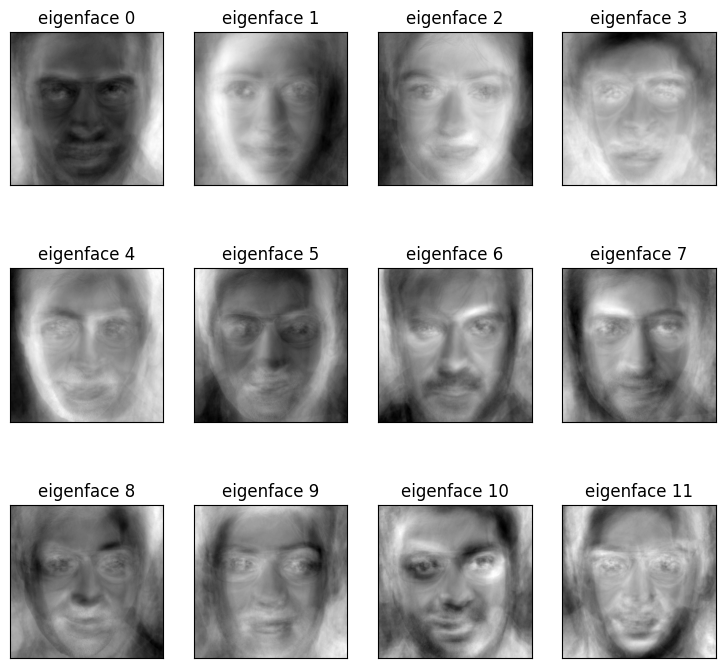

Extracting the top %d eigenfaces orthonormal basis
(337, 150) (113, 150)
(337, 8) (113, 8)
Project Done ....


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(x_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenfaces_title = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenfaces_title, h, w)
plt.show()
print("Extracting the top %d eigenfaces orthonormal basis")
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print( x_train_pca.shape,x_test_pca.shape)
Ida = LinearDiscriminantAnalysis()
Ida.fit(x_train_pca, y_train)
X_train_lda = Ida.transform(x_train_pca)
X_test_lda = Ida.transform(x_test_pca)
print(X_train_lda.shape, X_test_lda.shape)
print("Project Done ....")



In [20]:
clf = MLPClassifier(hidden_layer_sizes=(1024,), random_state=1, max_iter=300).fit(X_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)


Model Weights:
[(8, 1024), (1024, 9)]


Accuracy: 74.33628318584071


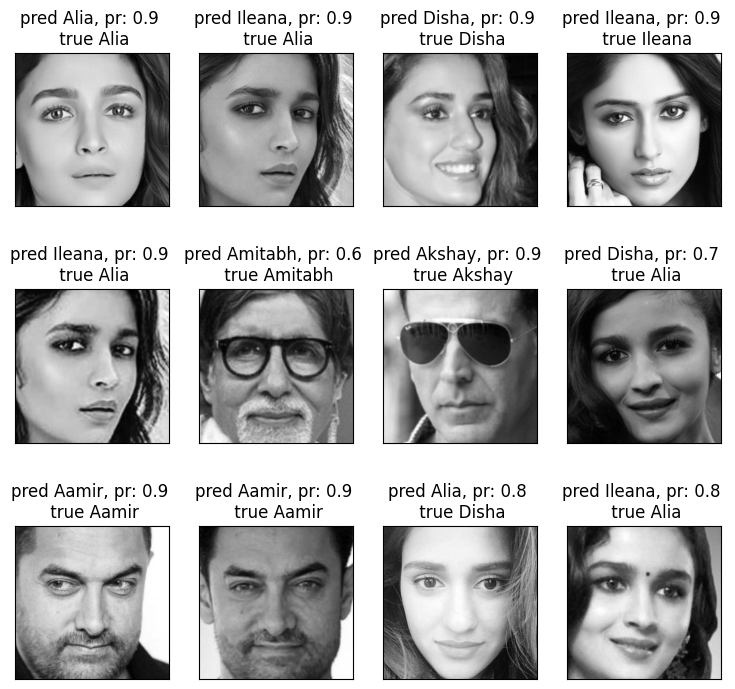

In [24]:
y_pred = [];y_prob = []
true_positive = 0
for test_face in X_test_lda:
  prob = clf.predict_proba([test_face])[0]
  class_id = np.where(prob == prob.max())[0][0]
  y_pred.append(class_id)
  y_prob.append(prob[class_id])

y_pred = np.array(y_pred)
prediction = []
for i in range(y_pred.shape[0]):
  true_name = class_names[y_test[i]]
  pred_name = class_names[y_pred[i]]
  result = 'pred %s, pr: %s \n true %s' % (pred_name, str(y_prob[i])[0:3], true_name)
  prediction.append(result)
  if true_name == pred_name:
    true_positive = true_positive + 1
print("Accuracy:",true_positive*100/y_pred.shape[0])
plot_gallery(x_test, prediction, h, w)
plt.show()